In [1]:
import pandas as pd

# Dosya yolu
dosya_yolu = r"C:\Users\hukus\Downloads\datasett\dataset.csv"

# Veriyi oku
df = pd.read_csv(dosya_yolu)

# Sadece 'date' ve 'content' sütunlarını tut
df_temiz = df[['date', 'content']]

# Temizlenmiş veriyi yeni bir dosyaya kaydet
temiz_dosya_yolu = r"C:\Users\hukus\Downloads\datasett\dataset_temiz.csv"
df_temiz.to_csv(temiz_dosya_yolu, index=False, encoding='utf-8')

print("Temizlenmiş dosya başarıyla kaydedildi:", temiz_dosya_yolu)


C:\Users\hukus\AppData\Local\Temp\ipykernel_6328\565678985.py:7: DtypeWarning: Columns (5,7,18,21,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dosya_yolu)


Temizlenmiş dosya başarıyla kaydedildi: C:\Users\hukus\Downloads\datasett\dataset_temiz.csv


In [5]:
import pandas as pd

# Dosya yolu
file_path = r"C:\Users\hukus\Downloads\datasett\dataset_temiz.csv"

# Sadece 'date' ve 'content' sütunlarını alarak yükleme 
df = pd.read_csv(file_path, usecols=["date", "content"])

# İlk 5 satırı göster
df.head()

,date,content
0,2022-01-01 23:59:59+00:00,I’m getting a sugar daddy this year!
1,2022-01-01 23:59:59+00:00,might make em french toast after and spoon a l...
2,2022-01-01 23:59:59+00:00,Our platform can be matched to your company’s ...
3,2022-01-01 23:59:59+00:00,Oh my God this first song. I can't with how am...
4,2022-01-01 23:59:59+00:00,Happy new year ! 😚🎉


In [3]:
import os
import pandas as pd

# Dosya yolu
file_path = r"C:\Users\hukus\Downloads\datasett\dataset_temiz.csv"

# 1. Dosya boyutu (MB cinsinden)
file_size = os.path.getsize(file_path) / (1024 * 1024)
print(f"Dosya boyutu: {file_size:.2f} MB")

# 2. Dosya formatı
file_format = os.path.splitext(file_path)[-1].lower()
print(f"Dosya formatı: {file_format}")

# 3. Toplam doküman sayısı (satır sayısı)
df = pd.read_csv(file_path)
print(f"Toplam doküman sayısı: {len(df)}")

Dosya boyutu: 66.89 MB
Dosya formatı: .csv
Toplam doküman sayısı: 547496


In [16]:
# Tarih sütununu datetime formatına çevir (hatalı tarihleri NaT yapar)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Geçersiz (NaT) tarihleri ve boş content hücrelerini düşür
df = df.dropna(subset=['date', 'content'])

# Temizlenmiş veri setinin boyutu
df.shape


(547481, 2)

In [17]:
# Tarihleri sadece 'gün' bazında al (saat/dakika olmadan)
df['day'] = df['date'].dt.date

# Kaç farklı gün olduğunu say
farkli_gun_sayisi = df['day'].nunique()
print(f"Farklı gün sayısı: {farkli_gun_sayisi}")


Farklı gün sayısı: 365


In [18]:
en_erkenci_tarih = df['date'].min()
en_gec_tarih = df['date'].max()

print(f"Veri aralığı: {en_erkenci_tarih} - {en_gec_tarih}")


Veri aralığı: 2022-01-01 23:59:35+00:00 - 2022-12-31 23:59:59+00:00


In [19]:
# Günlük tweet sayısını hesapla
gunluk_tweet_sayisi = df.groupby('day').size()

# Ortalama hesapla
gunluk_ortalama = gunluk_tweet_sayisi.mean()

print(f"Günlük ortalama tweet sayısı: {gunluk_ortalama:.2f}")

Günlük ortalama tweet sayısı: 1499.95


In [27]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hukus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hukus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [40]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Gerekli NLTK verilerini indir 
nltk.download('punkt')
nltk.download('stopwords')

# İngilizce stopword listesi
stop_words = set(stopwords.words('english'))

def temizle_metni(metin):
    # Eğer metin NaN (boş) ise, işlemi geç
    if not isinstance(metin, str):
        return ""
    
    # Küçük harfe çevir
    metin = metin.lower()

    # URL, mention, hashtag ve emoji sil
    metin = re.sub(r'http\S+|www\S+|https\S+', '', metin)
    metin = re.sub(r'@\w+|#\w+', '', metin)
    metin = re.sub(r'[^\x00-\x7F]+', '', metin)

    # Noktalama işaretleri ve sayıları temizle
    metin = metin.translate(str.maketrans('', '', string.punctuation))
    metin = re.sub(r'\d+', '', metin)

    # Tokenize işlemi (tek satır olarak)
    kelimeler = word_tokenize(metin)

    # Stopword'leri ve kısa kelimeleri kaldır
    kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words and len(kelime) > 2]

    return ' '.join(kelimeler)

# Veriyi yükle
df = pd.read_csv("C:/Users/hukus/Downloads/datasett/dataset_temiz.csv")

# Temizleme işlemini uygulayıp yeni sütunu oluştur
df['content_clean'] = df['content'].apply(temizle_metni)

# Değişiklikleri yeni bir CSV dosyasına kaydet
df.to_csv("C:/Users/hukus/Downloads/datasett/content_clean_versiyon.csv", index=False)

# Temizlenmiş verinin ilk 20 satırını görüntüle
print(df[['content', 'content_clean']].head(20))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hukus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hukus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              content  \
0                I’m getting a sugar daddy this year!   
1   might make em french toast after and spoon a l...   
2   Our platform can be matched to your company’s ...   
3   Oh my God this first song. I can't with how am...   
4                                 Happy new year ! 😚🎉   
5   Seeing John Oliver at the Kennedy center! http...   
6   Everyone should go watch Nuclear Family on HBO...   
7                           Real pero real real! 🤣🤣🤣🤣   
8   Dear diary,\n\nShe tried to steal my notebook,...   
9   Last year was wild. But damn, I understood mys...   
10  “Never limit yourself because of others’ limit...   
11                      quack https://t.co/M8iVui1wDf   
12  cry as much as you can, its a competition, and...   
13  Go to the barbershop and cut my name in you ha...   
14  i won jackbox the other day https://t.co/4y4jK...   
15  Happy Independence Day Haiti 1804-2022 (218 yr...   
16  Same vibes 🤍\n#SUNGHOON\n#성

In [47]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hukus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Gerekli NLTK verilerini indir
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  # WordNet için ek veri

# Lemmatizer tanımla
lemmatizer = WordNetLemmatizer()

# Veriyi oku
df = pd.read_csv("C:/Users/hukus/Downloads/datasett/content_clean_versiyon.csv")

def lemmatize_text(text):
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Lemmatization uygula
df['content_lemma'] = df['content_clean'].apply(lemmatize_text)

# Dosyayı kaydet
df.to_csv("C:/Users/hukus/Downloads/datasett/lemma_dataset.csv", index=False)

# İlk 20 satırı göster
print(df[['content_clean', 'content_lemma']].head(20))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hukus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hukus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hukus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                        content_clean  \
0                            getting sugar daddy year   
1                might make french toast spoon little   
2   platform matched companys brand adding persona...   
3   god first song cant amazing chick live hitting...   
4                                      happy new year   
5                   seeing john oliver kennedy center   
6   everyone watch nuclear family hbo amazing amaz...   
7                                 real pero real real   
8   dear diary tried steal notebook put name give ...   
9   last year wild damn understood became spiritua...   
10  never limit others limited imagination never l...   
11                                              quack   
12             cry much competition dont step gon win   
13                barbershop cut name hair kinda love   
14                                        jackbox day   
15                   happy independence day haiti yrs   
16                      vibes g

In [24]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Gerekli NLTK verilerini indir
nltk.download('punkt')

# Stemmer tanımla
stemmer = PorterStemmer()

# Veriyi oku
df = pd.read_csv("C:/Users/hukus/Downloads/datasett/lemma_dataset.csv")

def stem_text(text):
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Stemleme uygula
df['content_stem'] = df['content_clean'].apply(stem_text)

# Dosyayı kaydet
df.to_csv("C:/Users/hukus/Downloads/datasett/lemma_stem_dataset.csv", index=False)

# İlk 20 satırı göster
print(df[['content_clean', 'content_stem']].head(20))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hukus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                        content_clean  \
0                            getting sugar daddy year   
1                might make french toast spoon little   
2   platform matched companys brand adding persona...   
3   god first song cant amazing chick live hitting...   
4                                      happy new year   
5                   seeing john oliver kennedy center   
6   everyone watch nuclear family hbo amazing amaz...   
7                                 real pero real real   
8   dear diary tried steal notebook put name give ...   
9   last year wild damn understood became spiritua...   
10  never limit others limited imagination never l...   
11                                              quack   
12             cry much competition dont step gon win   
13                barbershop cut name hair kinda love   
14                                        jackbox day   
15                   happy independence day haiti yrs   
16                      vibes g

In [4]:
# Gerekli kütüphaneler
import pandas as pd
from gensim.models import Word2Vec
import nltk

# nltk tokenizer indir
nltk.download('punkt')

# CSV dosyasını oku
df = pd.read_csv(r"C:\Users\hukus\Downloads\datasett\lemma_stem_dataset.csv")

# İlk 5 satır
df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hukus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,date,content,content_clean,content_lemma,content_stem
0,2022-01-01 23:59:59+00:00,I’m getting a sugar daddy this year!,getting sugar daddy year,getting sugar daddy year,get sugar daddi year
1,2022-01-01 23:59:59+00:00,might make em french toast after and spoon a l...,might make french toast spoon little,might make french toast spoon little,might make french toast spoon littl
2,2022-01-01 23:59:59+00:00,Our platform can be matched to your company’s ...,platform matched companys brand adding persona...,platform matched company brand adding personal...,platform match compani brand ad person logo ur...
3,2022-01-01 23:59:59+00:00,Oh my God this first song. I can't with how am...,god first song cant amazing chick live hitting...,god first song cant amazing chick live hitting...,god first song cant amaz chick live hit note s...
4,2022-01-01 23:59:59+00:00,Happy new year ! 😚🎉,happy new year,happy new year,happi new year


In [2]:
import pandas as pd
import os
from gensim.models import Word2Vec

# Dosya yolu
dataset_path = r"C:\Users\hukus\Downloads\datasett\lemma_stem_dataset.csv"
save_dir = r"C:\Users\hukus\Downloads\datasett\models"

# Klasör yoksa oluştur
os.makedirs(save_dir, exist_ok=True)

# CSV dosyasını oku
df = pd.read_csv(dataset_path)

# content_lemma ve content_stem sütunlarını listele
lemma_corpus = df['content_lemma'].dropna().apply(lambda x: x.split()).tolist()
stem_corpus = df['content_stem'].dropna().apply(lambda x: x.split()).tolist()

# Word2Vec parametreleri
parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]

# Word2Vec eğitimi ve kaydetme fonksiyonu
def train_and_save_model(corpus, params, model_name_prefix):
    model = Word2Vec(
        sentences=corpus,
        vector_size=params['vector_size'],
        window=params['window'],
        min_count=1,
        sg=1 if params['model_type'] == 'skipgram' else 0
    )
    model_filename = f"{model_name_prefix}_{params['model_type']}_window{params['window']}_dim{params['vector_size']}.model"
    model.save(os.path.join(save_dir, model_filename))
    print(f"Model saved: {model_filename}")

# Lemmatize edilmiş corpus için modeller
for param in parameters:
    train_and_save_model(lemma_corpus, param, "lemmatized_model")

# Stem edilmiş corpus için modeller
for param in parameters:
    train_and_save_model(stem_corpus, param, "stemmed_model")

Model saved: lemmatized_model_cbow_window2_dim100.model
Model saved: lemmatized_model_skipgram_window2_dim100.model
Model saved: lemmatized_model_cbow_window4_dim100.model
Model saved: lemmatized_model_skipgram_window4_dim100.model
Model saved: lemmatized_model_cbow_window2_dim300.model
Model saved: lemmatized_model_skipgram_window2_dim300.model
Model saved: lemmatized_model_cbow_window4_dim300.model
Model saved: lemmatized_model_skipgram_window4_dim300.model
Model saved: stemmed_model_cbow_window2_dim100.model
Model saved: stemmed_model_skipgram_window2_dim100.model
Model saved: stemmed_model_cbow_window4_dim100.model
Model saved: stemmed_model_skipgram_window4_dim100.model
Model saved: stemmed_model_cbow_window2_dim300.model
Model saved: stemmed_model_skipgram_window2_dim300.model
Model saved: stemmed_model_cbow_window4_dim300.model
Model saved: stemmed_model_skipgram_window4_dim300.model


In [3]:
from gensim.models import Word2Vec
import os

# Model klasörü
models_dir = r"C:\Users\hukus\Downloads\datasett\models"

# Kullanılacak model dosyaları
model_files = [
    "lemmatized_model_cbow_window2_dim100.model",
    "stemmed_model_skipgram_window4_dim100.model",
    "lemmatized_model_skipgram_window2_dim300.model"
]

# Kullanacağımız kelime
query_word = 'year'

# 'year' kelimesi ile en benzer 3 kelimeyi yazdırmak
def print_similar_words(model, model_name):
    if query_word in model.wv:
        similarity = model.wv.most_similar(query_word, topn=3)
        print(f"\n{model_name} Modeli - '{query_word}' ile En Benzer 3 Kelime:")
        for word, score in similarity:
            print(f"Kelime: {word}, Benzerlik Skoru: {score}")
    else:
        print(f"\n{model_name} Modeli: '{query_word}' kelimesi bulunamadı!")

# 3 modeli sırayla yükleyip benzer kelimeleri yazdır
for model_file in model_files:
    model_path = os.path.join(models_dir, model_file)
    model = Word2Vec.load(model_path)
    
    # Model adı düzenleme
    model_name = model_file.replace(".model", "").replace("_", " ").title()
    
    print_similar_words(model, model_name)


Lemmatized Model Cbow Window2 Dim100 Modeli - 'year' ile En Benzer 3 Kelime:
Kelime: decade, Benzerlik Skoru: 0.8888677954673767
Kelime: month, Benzerlik Skoru: 0.8669477701187134
Kelime: yr, Benzerlik Skoru: 0.8576725125312805

Stemmed Model Skipgram Window4 Dim100 Modeli - 'year' ile En Benzer 3 Kelime:
Kelime: month, Benzerlik Skoru: 0.89000004529953
Kelime: decad, Benzerlik Skoru: 0.8758276104927063
Kelime: yr, Benzerlik Skoru: 0.8702577948570251

Lemmatized Model Skipgram Window2 Dim300 Modeli - 'year' ile En Benzer 3 Kelime:
Kelime: decade, Benzerlik Skoru: 0.809527575969696
Kelime: yr, Benzerlik Skoru: 0.7980549931526184
Kelime: month, Benzerlik Skoru: 0.7364195585250854


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import os
import numpy as np

# 1. Veri setini oku
dosya_yolu = r"C:\Users\hukus\Downloads\datasett\lemma_stem_dataset.csv"
df = pd.read_csv(dosya_yolu)

# 2. Lemmatize edilmiş tweet'leri liste olarak al
lemmatized_texts = df['content_lemma'].astype(str).tolist()

# 3. TF-IDF vektörizerı başlat ve eğit
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(lemmatized_texts)

# Not: TF-IDF matrisi büyük olduğu için hata verdi bundan dolayı"seyrek matris" (sparse matrix) olarak tuttum.
# Bu yapı sadece sıfır olmayan değerleri belleğe alır ve çok büyük veri kümelerinde RAM kullanımını ciddi şekilde azaltır.

# 4. Modeli ve vektörleri kaydet
kayit_klasoru = "tf_idf_models"
os.makedirs(kayit_klasoru, exist_ok=True)

with open(os.path.join(kayit_klasoru, "lemma_tf_idf_vectorizer.pkl"), "wb") as f:
    pickle.dump(vectorizer, f)

with open(os.path.join(kayit_klasoru, "lemma_tf_idf_matrix.pkl"), "wb") as f:
    pickle.dump(tfidf_matrix, f)

# 5. Özellik isimlerini al
feature_names = vectorizer.get_feature_names_out()

# 6. İlk satırdaki en yüksek 5 TF-IDF skoruna sahip kelimeyi bul (seyrek matris ile)
first_row = tfidf_matrix[0]  # bu satır seyrek (sparse) formda
nonzero_indices = first_row.indices
nonzero_values = first_row.data

top5_indices = np.argsort(nonzero_values)[-5:][::-1]
top5_words = [(feature_names[nonzero_indices[i]], nonzero_values[i]) for i in top5_indices]

print("İlk tweet'te en yüksek TF-IDF skoruna sahip 5 kelime:")
for word, score in top5_words:
    print(f"{word}: {score:.4f}")

# 7. Örnek bir kelime için benzerlik kontrolü (seyrek matrisle ve toarray kullanmadan)
kelime = 'year'
if kelime in feature_names:
    kelime_index = feature_names.tolist().index(kelime)
    kelime_vector = tfidf_matrix[:, kelime_index].T  # tek kelime vektörü (transpose edildi)
    
    # TF-IDF matrisinin sütunlarıyla (diğer kelimelerle) benzerliğini hesapla
    similarities = cosine_similarity(kelime_vector, tfidf_matrix.T).flatten()
    top_5_indices = similarities.argsort()[-6:][::-1]  # kendisi dahil

    print(f"\n'{kelime}' kelimesine en benzer 5 kelime (cosine similarity):")
    for index in top_5_indices:
        print(f"{feature_names[index]}: {similarities[index]:.4f}")
else:
    print(f"'{kelime}' kelimesi TF-IDF vektörlerinde bulunamadı.")


İlk tweet'te en yüksek TF-IDF skoruna sahip 5 kelime:
sugar: 0.6150
daddy: 0.5845
getting: 0.4014
year: 0.3451

'year' kelimesine en benzer 5 kelime (cosine similarity):
year: 1.0000
ago: 0.1816
old: 0.1375
new: 0.1234
happy: 0.0975
last: 0.0831


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import os
import numpy as np

# 1. Veri setini oku
dosya_yolu = r"C:\Users\hukus\Downloads\datasett\lemma_stem_dataset.csv"
df = pd.read_csv(dosya_yolu)

# 2. Stem edilmiş tweet'leri al
stemmed_texts = df['content_stem'].astype(str).tolist()

# 3. TF-IDF vektörizerı başlat ve eğit
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(stemmed_texts)

# Not: TF-IDF matrisi büyük olduğu için hata verdi bundan dolayı"seyrek matris" (sparse matrix) olarak tuttum.
# Bu, bellekte sadece sıfır olmayan değerlerin tutulmasını sağlar. Böylece hafıza kullanımı ciddi oranda azalır.

# 4. Modeli ve vektörleri kaydet
kayit_klasoru = "tf_idf_models"
os.makedirs(kayit_klasoru, exist_ok=True)

with open(os.path.join(kayit_klasoru, "stem_tf_idf_vectorizer.pkl"), "wb") as f:
    pickle.dump(vectorizer, f)

with open(os.path.join(kayit_klasoru, "stem_tf_idf_matrix.pkl"), "wb") as f:
    pickle.dump(tfidf_matrix, f)

# 5. Özellik isimlerini al
feature_names = vectorizer.get_feature_names_out()

# 6. İlk satırdaki en yüksek 5 TF-IDF skoruna sahip kelimeyi bul
first_row = tfidf_matrix[0]
nonzero_indices = first_row.indices
nonzero_values = first_row.data

top5_indices = np.argsort(nonzero_values)[-5:][::-1]
top5_words = [(feature_names[nonzero_indices[i]], nonzero_values[i]) for i in top5_indices]

print("İlk stemmed tweet'te en yüksek TF-IDF skoruna sahip 5 kelime:")
for word, score in top5_words:
    print(f"{word}: {score:.4f}")

# 7. Örnek bir kelime için benzerlik kontrolü
kelime = 'year'
if kelime in feature_names:
    kelime_index = feature_names.tolist().index(kelime)
    kelime_vector = tfidf_matrix[:, kelime_index].T

    similarities = cosine_similarity(kelime_vector, tfidf_matrix.T).flatten()
    top_5_indices = similarities.argsort()[-6:][::-1]

    print(f"\n'{kelime}' kelimesine en benzer 5 kelime (cosine similarity):")
    for index in top_5_indices:
        print(f"{feature_names[index]}: {similarities[index]:.4f}")
else:
    print(f"'{kelime}' kelimesi TF-IDF vektörlerinde bulunamadı.")


İlk stemmed tweet'te en yüksek TF-IDF skoruna sahip 5 kelime:
sugar: 0.6402
daddi: 0.6085
year: 0.3593
get: 0.3014

'year' kelimesine en benzer 5 kelime (cosine similarity):
year: 1.0000
ago: 0.1816
old: 0.1369
new: 0.1212
happi: 0.0955
last: 0.0837


HAM VERİ ANALİZ BİLGİLERİ:
• Toplam kelime sayısı (token): 8471651
• Farklı kelime sayısı (type): 594344
• En sık geçen ilk 10 kelime:
   1. the → 271431 kez
   2. to → 194666 kez
   3. i → 175106 kez
   4. a → 162904 kez
   5. and → 147976 kez
   6. of → 113349 kez
   7. is → 104183 kez
   8. in → 104017 kez
   9. for → 93322 kez
   10. you → 84300 kez


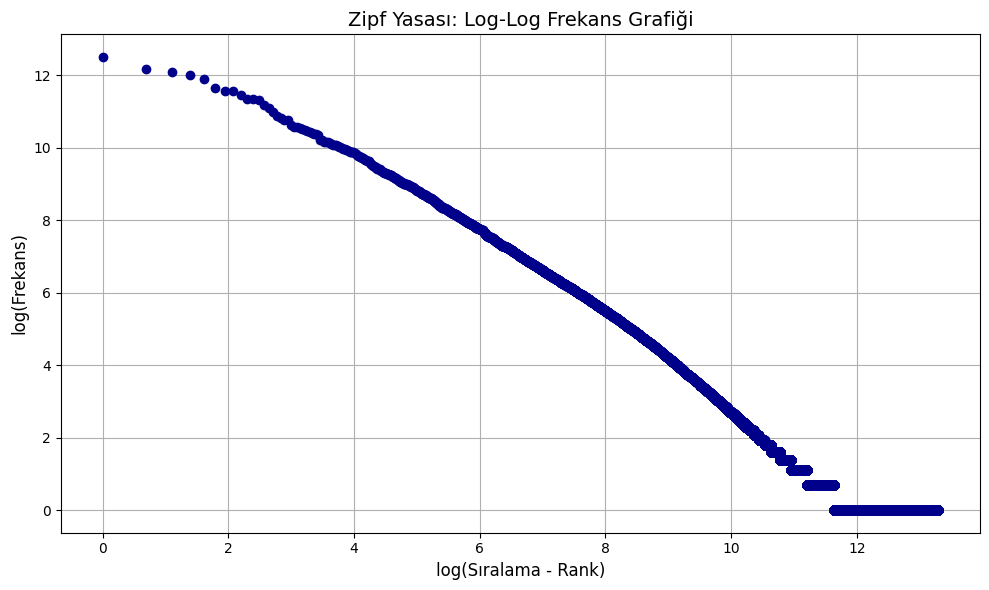

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

# Dosyayı oku
df = pd.read_csv(r"C:\Users\hukus\Downloads\datasett\dataset_temiz.csv")

# Sadece content sütununu kullan
texts = df['content'].astype(str).tolist()

# Tüm içerikleri tek bir metin haline getir
full_text = ' '.join(texts)

# Küçük harfe çevir, noktalama işaretlerini temizle
full_text = re.sub(r'[^\w\s]', '', full_text.lower())

# Kelimelere ayır
words = full_text.split()

# Kelime frekanslarını hesapla
word_counts = Counter(words)

# En sık geçen kelimeleri frekanslarına göre sırala
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# ANALİZ ÇIKTILARI
print("HAM VERİ ANALİZ BİLGİLERİ:")
print(f"• Toplam kelime sayısı (token): {len(words)}")
print(f"• Farklı kelime sayısı (type): {len(word_counts)}")
print("• En sık geçen ilk 10 kelime:")
for i, (word, freq) in enumerate(sorted_word_counts[:10], 1):
    print(f"   {i}. {word} → {freq} kez")

# Zipf grafiği için verileri hazırla
frequencies = [freq for word, freq in sorted_word_counts]
ranks = range(1, len(frequencies) + 1)

# Log-log grafiği çiz
plt.figure(figsize=(10, 6))
plt.plot(np.log(ranks), np.log(frequencies), marker='o', linestyle='none', color='darkblue')
plt.title("Zipf Yasası: Log-Log Frekans Grafiği", fontsize=14)
plt.xlabel("log(Sıralama - Rank)", fontsize=12)
plt.ylabel("log(Frekans)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


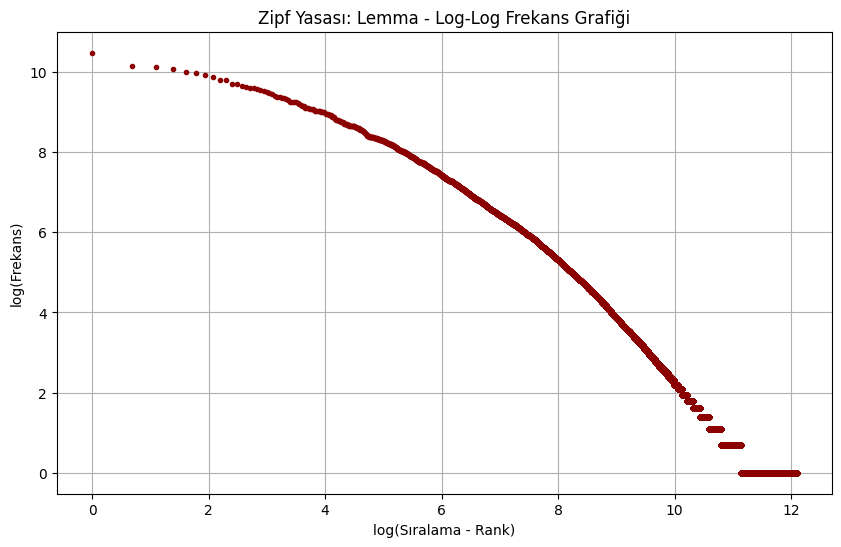


 Lemma Verisi:
- Toplam kelime sayısı: 4273435
- Farklı kelime sayısı: 179385
- İlk 10 kelime ve frekansı: [('like', 35730), ('one', 25429), ('get', 25112), ('time', 23595), ('dont', 21966), ('day', 21597), ('love', 20507), ('good', 19397), ('people', 18059), ('amp', 17959)]


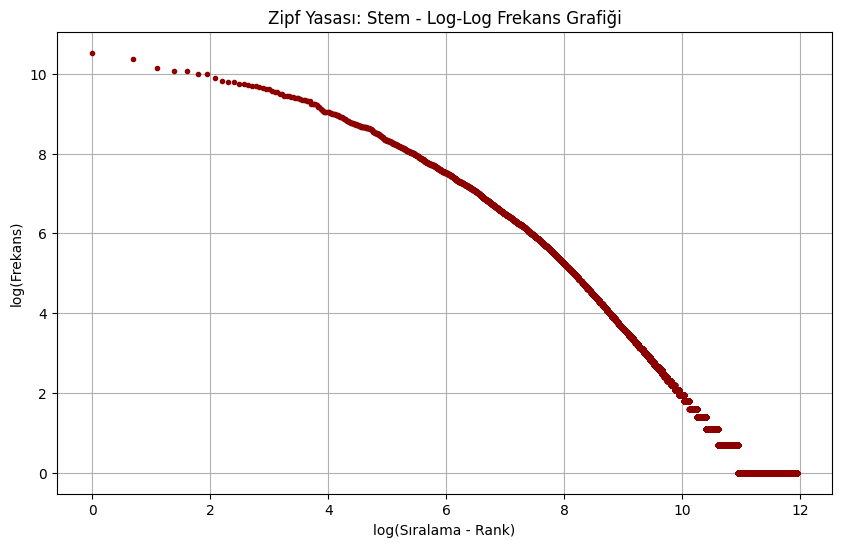


 Stem Verisi:
- Toplam kelime sayısı: 4273435
- Farklı kelime sayısı: 153032
- İlk 10 kelime ve frekansı: [('like', 37272), ('get', 31816), ('one', 25436), ('time', 23839), ('love', 23323), ('dont', 21976), ('day', 21608), ('good', 19656), ('make', 18138), ('peopl', 18063)]


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Dosya yolu
file_path = r"C:\Users\hukus\Downloads\datasett\lemma_stem_dataset.csv"

# CSV dosyasını oku
df = pd.read_csv(file_path)

def zipf_analysis(text_series, title_suffix):
    # Tüm metinleri birleştir
    all_text = ' '.join(text_series.astype(str))
    words = all_text.split()

    # Frekansları say
    word_freq = Counter(words)
    frequencies = sorted(word_freq.values(), reverse=True)

    # Log-log verileri
    ranks = np.arange(1, len(frequencies) + 1)
    log_ranks = np.log(ranks)
    log_freqs = np.log(frequencies)

    # Grafik çizimi
    plt.figure(figsize=(10, 6))
    plt.plot(log_ranks, log_freqs, marker='o', linestyle='none', markersize=3, color='darkred')
    plt.title(f"Zipf Yasası: {title_suffix} - Log-Log Frekans Grafiği")
    plt.xlabel("log(Sıralama - Rank)")
    plt.ylabel("log(Frekans)")
    plt.grid(True)
    plt.show()

    print(f"\n {title_suffix} Verisi:")
    print(f"- Toplam kelime sayısı: {len(words)}")
    print(f"- Farklı kelime sayısı: {len(word_freq)}")
    print(f"- İlk 10 kelime ve frekansı: {word_freq.most_common(10)}")
    return word_freq

# Analizi çalıştır
lemma_freq = zipf_analysis(df['content_lemma'], "Lemma")
stem_freq = zipf_analysis(df['content_stem'], "Stem")


In [1]:
import pandas as pd

# 1. Dosya yolunu belirt
input_path = r"C:\Users\hukus\Downloads\datasett\lemma_stem_dataset.csv"
output_path = r"C:\Users\hukus\Downloads\datasett\id_dataset.csv"

# 2. Dosyayı oku
df = pd.read_csv(input_path)

# 3. document_id sütununu oluştur (doc0, doc1, doc2, ...)
df.insert(0, 'document_id', ['doc' + str(i) for i in range(len(df))])

# 4. Yeni CSV dosyasına kaydet
df.to_csv(output_path, index=False)

print(f"Yeni dosya başarıyla kaydedildi: {output_path}")


Yeni dosya başarıyla kaydedildi: C:\Users\hukus\Downloads\datasett\id_dataset.csv


In [8]:
# Giriş cümlesi (doc117) - lemma
query_lemma = df.loc[df['document_id'] == 'doc117', 'content_lemma'].values[0]
print(f"Doc117 (Lemmatized): {query_lemma}")
# Giriş cümlesi (doc117) - stem
query_stem = df.loc[df['document_id'] == 'doc117', 'content_stem'].values[0]
print(f"Doc117 (Stemmed): {query_stem}")

Doc117 (Lemmatized): happy birthday former player legend amp king kop signed atltico madrid free transfer lfc apps ssists lfc honour league cup
Doc117 (Stemmed): happi birthday former player legend amp king kop sign atltico madrid free transfer lfc app ssist lfc honour leagu cup


In [6]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics.pairwise import cosine_similarity

# === Dosya Yolları === #
dataset_path = r"C:\Users\hukus\Downloads\datasett\id_dataset.csv"
model_dir = r"C:\Users\hukus\Downloads\datasett\tf_idf_models"

# === Veriyi Yükle === #
df = pd.read_csv(dataset_path)

# --- LEMMATIZED TF-IDF --- #
with open(f"{model_dir}/lemma_tf_idf_vectorizer.pkl", "rb") as f:
    vectorizer_lemma = pickle.load(f)

with open(f"{model_dir}/lemma_tf_idf_matrix.pkl", "rb") as f:
    tfidf_matrix_lemma = pickle.load(f)

# Giriş cümlesi (doc117) - lemma
query_lemma = df.loc[df['document_id'] == 'doc117', 'content_lemma'].values[0]
query_vec_lemma = vectorizer_lemma.transform([query_lemma])
similarities_lemma = cosine_similarity(query_vec_lemma, tfidf_matrix_lemma).flatten()

top5_lemma_idx = similarities_lemma.argsort()[::-1][1:6]  # doc10 hariç
print("\n Lemmatized TF-IDF Benzerliği - doc117 ile en benzer 5 doküman:\n")
for idx in top5_lemma_idx:
    doc_id = df.iloc[idx]['document_id']
    score = similarities_lemma[idx]
    sentence = df.iloc[idx]['content_lemma']
    print(f"{doc_id}: {score:.4f}\n→ {sentence}\n")

# --- STEMMED TF-IDF --- #
with open(f"{model_dir}/stem_tf_idf_vectorizer.pkl", "rb") as f:
    vectorizer_stem = pickle.load(f)

with open(f"{model_dir}/stem_tf_idf_matrix.pkl", "rb") as f:
    tfidf_matrix_stem = pickle.load(f)

# Giriş cümlesi (doc117) - stem
query_stem = df.loc[df['document_id'] == 'doc117', 'content_stem'].values[0]
query_vec_stem = vectorizer_stem.transform([query_stem])
similarities_stem = cosine_similarity(query_vec_stem, tfidf_matrix_stem).flatten()

top5_stem_idx = similarities_stem.argsort()[::-1][1:6]
print("\n Stemmed TF-IDF Benzerliği - doc117 ile en benzer 5 doküman:\n")
for idx in top5_stem_idx:
    doc_id = df.iloc[idx]['document_id']
    score = similarities_stem[idx]
    sentence = df.iloc[idx]['content_stem']
    print(f"{doc_id}: {score:.4f}\n→ {sentence}\n") 



 Lemmatized TF-IDF Benzerliği - doc117 ile en benzer 5 doküman:

doc245208: 0.5722
→ happy birthday former player nicolas anelka signed psg loan loan lfc apps ssists happy birthday former player joe allen signed swansea city lfc apps ssists

doc9249: 0.5557
→ today would former player james kelsos birthday signed renton free transfer lfc app lfc honour lancashire league liverpool senior cup

doc230084: 0.5529
→ happy birthday former player joey jones signed wrexham lfc apps ssists lfc honour division championship european cup charity shield european super cup uefa cup

doc213559: 0.5499
→ today would former player jim harleys birthday signed heart beath free transfer lfc apps lfc honour football league north championship division championship

doc145611: 0.5287
→ otd signed general stevenson padiham free transfer lfc apps otd signed goalkeeper dirk kemp transvaal free transfer lfc apps lfc honour football league north championship


 Stemmed TF-IDF Benzerliği - doc117 ile en benzer 5 

In [1]:
import os
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# === Dosya Yolları === #
dataset_path = r"C:\Users\hukus\Downloads\datasett\id_dataset.csv"
model_dir = r"C:\Users\hukus\Downloads\datasett\models"  # Word2Vec modellerinin yolu

# === Veriyi Yükle === #
df = pd.read_csv(dataset_path)

# Giriş cümlesi - doc117
doc_id = 'doc117'
lemma_input = df.loc[df['document_id'] == doc_id, 'content_lemma'].values[0].split()
stem_input = df.loc[df['document_id'] == doc_id, 'content_stem'].values[0].split()

# Word2Vec model isimlerini listele
model_files = sorted([f for f in os.listdir(model_dir) if f.endswith(".model")])

def get_average_vector(model, sentence_tokens):
    vectors = [model.wv[word] for word in sentence_tokens if word in model.wv]
    if not vectors:
        return None  # Eğer hiçbir kelimenin vektörü yoksa
    return np.mean(vectors, axis=0)

def get_similarity_scores(model, corpus):
    # Tüm dokümanlar için vektörleri hesapla
    doc_vectors = []
    for tokens in corpus:
        vec = get_average_vector(model, tokens)
        doc_vectors.append(vec)

    # Giriş cümlesinin vektörü
    query_vector = get_average_vector(model, lemma_input if 'lemmatized' in model_name else stem_input)

    # Cosine similarity hesapla
    similarities = []
    for vec in doc_vectors:
        if vec is None:
            similarities.append(0.0)
        else:
            score = cosine_similarity([query_vector], [vec])[0][0]
            similarities.append(score)

    return np.array(similarities)

# Her model için benzerlik analizi
for model_file in model_files:
    model_path = os.path.join(model_dir, model_file)
    model_name = model_file.replace(".model", "")
    model = Word2Vec.load(model_path)

    # Uygun veri kolonunu seç (lemma/stem)
    if "lemmatized" in model_name:
        corpus = df['content_lemma'].dropna().apply(lambda x: x.split()).tolist()
    else:
        corpus = df['content_stem'].dropna().apply(lambda x: x.split()).tolist()

    # Benzerlik hesapla
    similarity_scores = get_similarity_scores(model, corpus)

    # En benzer ilk 5 (kendisi hariç)
    top5_idx = similarity_scores.argsort()[::-1][1:6]

    print(f"\n {model_name.upper()} - doc117 ile en benzer 5 doküman:\n")
    for idx in top5_idx:
        docid = df.iloc[idx]['document_id']
        text = df.iloc[idx]['content_lemma'] if "lemmatized" in model_name else df.iloc[idx]['content_stem']
        print(f"{docid}: {similarity_scores[idx]:.4f}\n→ {text}\n")

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,



 LEMMATIZED_MODEL_CBOW_WINDOW2_DIM100 - doc117 ile en benzer 5 doküman:

doc9175: 0.9665
→ still need booster fully vaccinatedand still need get tested fully vaccinatedand still need wear mask fully vaccinatedand still get hospitalized fully vaccinated probably time admit got conned

doc228517: 0.9591
→ happy guy gone way moral whatsoever horrible person dont care he replaced freedom caucus guy whatever man betrayed entire family bone former isi bride paid stay quiet

doc212105: 0.9577
→ saturday night alright fighting get little action

doc502222: 0.9393
→ cat verse carolyn well

doc159502: 0.9388
→ put packet glass glass little glass dish microwave got close door door door microwave wrong


 LEMMATIZED_MODEL_CBOW_WINDOW2_DIM300 - doc117 ile en benzer 5 doküman:

doc9175: 0.9605
→ still need booster fully vaccinatedand still need get tested fully vaccinatedand still need wear mask fully vaccinatedand still get hospitalized fully vaccinated probably time admit got conned

doc228517: 0

In [7]:
import pandas as pd

# Her modelin ilk 5 sonucunu küme olarak tanımla
model_results = {
    "TFIDF_Lemma": {"doc245208", "doc9249", "doc230084", "doc213559", "doc145611"},
    "TFIDF_Stem": {"doc9249", "doc245208", "doc213559", "doc230084", "doc145611"},
    "L_CBOW_2_100": {"doc9175", "doc228517", "doc212105", "doc502222", "doc159502"},
    "L_CBOW_2_300": {"doc9175", "doc228517", "doc212105", "doc159502", "doc502222"},
    "L_CBOW_4_100": {"doc9175", "doc228517", "doc212105", "doc159502", "doc243534"},
    "L_CBOW_4_300": {"doc9175", "doc228517", "doc212105", "doc159502", "doc243534"},
    "L_SG_2_100": {"doc9175", "doc228517", "doc212105", "doc215088", "doc243534"},
    "L_SG_2_300": {"doc9175", "doc228517", "doc212105", "doc215088", "doc243534"},
    "L_SG_4_100": {"doc9175", "doc212105", "doc228517", "doc215088", "doc243534"},
    "L_SG_4_300": {"doc9175", "doc212105", "doc228517", "doc215088", "doc243534"},
    "S_CBOW_2_100": {"doc9175", "doc228517", "doc212105", "doc159502", "doc462802"},
    "S_CBOW_2_300": {"doc9175", "doc228517", "doc212105", "doc159502", "doc144617"},
    "S_CBOW_4_100": {"doc9175", "doc228517", "doc212105", "doc159502", "doc243534"},
    "S_CBOW_4_300": {"doc9175", "doc228517", "doc212105", "doc159502", "doc243534"},
    "S_SG_2_100": {"doc9175", "doc228517", "doc212105", "doc215088", "doc243534"},
    "S_SG_2_300": {"doc9175", "doc228517", "doc212105", "doc215088", "doc243534"},
    "S_SG_4_100": {"doc9175", "doc212105", "doc228517", "doc215088", "doc243534"},
    "S_SG_4_300": {"doc9175", "doc212105", "doc228517", "doc215088", "doc243534"},
}

# Model isimlerini sırayla listele
model_names = list(model_results.keys())

# Jaccard matrisini oluştur
jaccard_matrix = []
for model_a in model_names:
    row = []
    set_a = model_results[model_a]
    for model_b in model_names:
        set_b = model_results[model_b]
        intersection = len(set_a.intersection(set_b))
        union = len(set_a.union(set_b))
        jaccard_score = intersection / union
        row.append(jaccard_score)
    jaccard_matrix.append(row)

# DataFrame olarak matris
jaccard_df = pd.DataFrame(jaccard_matrix, index=model_names, columns=model_names)

# Matrise görsel olarak bakmak isterseniz:
print("\n Jaccard Similarity Matrix (18x18):")
print(jaccard_df.round(2))

# CSV olarak kaydet
jaccard_df.to_csv("jaccard_similarity_matrix.csv", index=True)
print("\n 'jaccard_similarity_matrix.csv' olarak kaydedildi.")



 Jaccard Similarity Matrix (18x18):
              TFIDF_Lemma  TFIDF_Stem  L_CBOW_2_100  L_CBOW_2_300  \
TFIDF_Lemma           1.0         1.0          0.00          0.00   
TFIDF_Stem            1.0         1.0          0.00          0.00   
L_CBOW_2_100          0.0         0.0          1.00          1.00   
L_CBOW_2_300          0.0         0.0          1.00          1.00   
L_CBOW_4_100          0.0         0.0          0.67          0.67   
L_CBOW_4_300          0.0         0.0          0.67          0.67   
L_SG_2_100            0.0         0.0          0.43          0.43   
L_SG_2_300            0.0         0.0          0.43          0.43   
L_SG_4_100            0.0         0.0          0.43          0.43   
L_SG_4_300            0.0         0.0          0.43          0.43   
S_CBOW_2_100          0.0         0.0          0.67          0.67   
S_CBOW_2_300          0.0         0.0          0.67          0.67   
S_CBOW_4_100          0.0         0.0          0.67          0.67 